In [2]:
%matplotlib inline
import numpy as np
import matplotlib as plt
from qutip import *

In [1]:
maxPhoton = 3
maxCav = 4
theta = -0.8*np.pi /2
J = 2.0
U = 0
theta = theta/maxCav
#定义常数
vac = basis(maxPhoton,0)
adown = destroy(maxPhoton)
adown_list = []
aup = create(maxPhoton)
aup_list = []
num = aup*adown
num_list = []
#定义了单体产生湮灭算符、粒子数算符、真空态
for n in range(maxCav):
    op_list = []
    for m in range(maxCav):
        op_list.append(qeye(maxPhoton))
    op_list[n] = adown
    adown_list.append(tensor(op_list))
    op_list[n] = aup
    aup_list.append(tensor(op_list))
    op_list[n] = num
    num_list.append(tensor(op_list))
#定义了多体产生湮灭算符、粒子数算符
op_list = []
for m in range(maxCav):
        op_list.append(vac)
vac = tensor(op_list)
#定义了多体真空态
H = 0
for n in range(maxCav):
    startsite = n
    targetsite = n+1
    if startsite == maxCav-1:
        targetsite = 0
    #如果是最后一个格点，下一个格点将是第一个
    temp = np.exp(1j*theta)*aup_list[startsite]*adown_list[targetsite]
    H += J * (temp + temp.dag())
    H += 0.5*U*(num_list[n]*num_list[n]-num_list[n])
#定义了哈密顿
psi0 = (aup_list[0]*vac).unit()

NameError: name 'np' is not defined

In [24]:
t = np.linspace(0,3,1000)
result = mesolve(H,psi0,t,[],num_list)

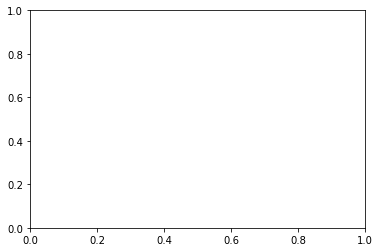

In [25]:
fig,ax = plt.pyplot.subplots()

In [26]:
for i in range(maxCav):
    ax.plot(t,result.expect[i])
fig.set_size_inches(14.5, 8)

In [30]:
x = result.expect[0]*(-1)+result.expect[1]*1+result.expect[2]*1+result.expect[3]*(-1)
y = result.expect[0]*(-1)+result.expect[1]*(-1)+result.expect[2]*1+result.expect[3]*1
ax.plot(y/2 ,x/2)

In [29]:
ax.clear()

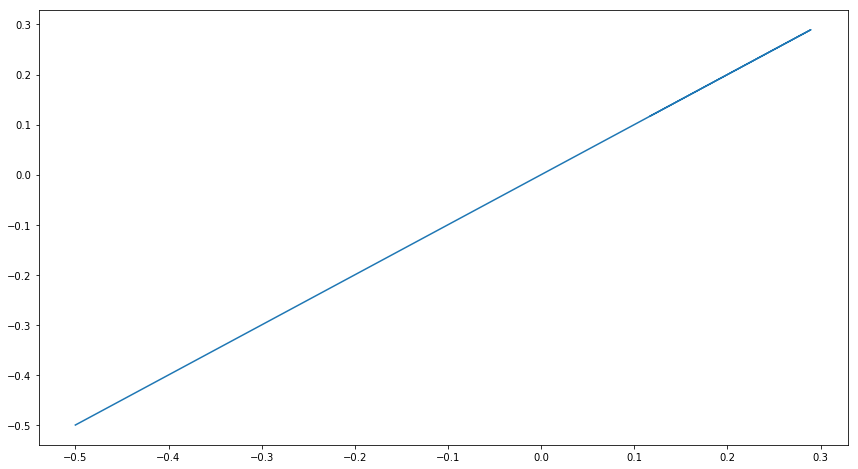

In [31]:
fig